<a href="https://colab.research.google.com/github/Leyladeligoz/GlobalHubBootcampFinalProje/blob/main/ModelHazirlanmasiveEgitilmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_X_train = pd.read_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_X_train.csv')
df_X_val = pd.read_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_X_val.csv')
df_X_test = pd.read_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_X_test.csv')

In [ ]:
df_y_train = pd.read_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_y_train.csv')
df_y_val = pd.read_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_y_val.csv')
df_y_test = pd.read_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_y_test.csv')

In [ ]:
df_X_train

,Image
0,[[ 0 0 0 0 0 4 0 0 0 5 0 ...
1,[[ 0 0 0 0 0 4 0 0 0 5 0 ...
2,[[ 0 0 0 0 0 4 0 0 0 5 0 ...
3,[[ 0 0 0 0 0 4 0 0 0 5 0 ...
4,[[ 0 0 0 0 0 4 0 0 0 5 0 ...
...,...
6980,[[ 0 0 0 0 0 4 0 0 0 5 0 ...
6981,[[ 0 0 0 0 0 4 0 0 0 5 0 ...
6982,[[ 0 0 0 0 0 4 0 0 0 5 0 ...
6983,[[ 0 0 0 0 0 4 0 0 0 5 0 ...


In [ ]:
df_y_train

,ClassId
0,0
1,7
2,9
3,1
4,7
...,...
6980,3
6981,4
6982,0
6983,8


In [ ]:
image_width = 25
image_height = 25

In [ ]:
X_train = df_X_train.to_numpy()
X_val = df_X_val.to_numpy()
X_test = df_X_test.to_numpy()

In [ ]:
y_train = df_y_train.to_numpy()
y_val = df_y_val.to_numpy()
y_test = df_y_test.to_numpy()

In [ ]:
y_train

array([[0],
       [7],
       [9],
       ...,
       [0],
       [8],
       [9]])

In [ ]:
print(f'X_train.shape :{X_train.shape}')
print(f'X_train.ndim :{X_train.ndim}')
print(f'X_train.size :{X_train.size}')

X_train.shape :(6985, 1)
X_train.ndim :2
X_train.size :6985


In [ ]:
print(f'y_train.shape :{y_train.shape}')
print(f'y_train.ndim :{y_train.ndim}')
print(f'y_train.size :{y_train.size}')

y_train.shape :(6985, 1)
y_train.ndim :2
y_train.size :6985


In [ ]:
def str_to_numpy_array(arr) :
  for i in range(arr.size):
    a = np.fromstring((arr[i][0]).replace('[', ' ').replace(']', ' '), dtype=int, sep=' ')
    b = a.reshape(image_width,image_height)
    arr[i][0] = b

  return arr

In [ ]:
X_train = str_to_numpy_array(X_train)
X_val = str_to_numpy_array(X_val)
X_test = str_to_numpy_array(X_test)

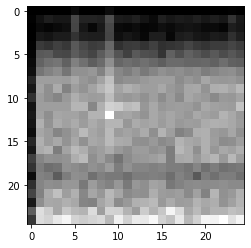

In [ ]:
plt.imshow(X_train[500][0], cmap="gray")

In [ ]:
X_train = X_train/255
X_val = X_val/255
X_test = X_val/255

In [ ]:
X_train[:1]

array([[array([[0.        , 0.        , 0.        , 0.        , 0.        ,
                0.01568627, 0.        , 0.        , 0.        , 0.01960784,
                0.        , 0.        , 0.        , 0.        , 0.        ,
                0.        , 0.        , 0.        , 0.        , 0.        ,
                0.        , 0.        , 0.        , 0.00392157, 0.        ],
               [0.00392157, 0.02745098, 0.04705882, 0.03529412, 0.03529412,
                0.10980392, 0.05490196, 0.05490196, 0.05098039, 0.12156863,
                0.04313725, 0.03921569, 0.05098039, 0.03137255, 0.01568627,
                0.05098039, 0.03529412, 0.04313725, 0.03921569, 0.05098039,
                0.03529412, 0.04705882, 0.03529412, 0.07843137, 0.03921569],
               [0.        , 0.01568627, 0.00784314, 0.01568627, 0.02352941,
                0.10588235, 0.03529412, 0.01176471, 0.03921569, 0.10980392,
                0.01568627, 0.01176471, 0.01960784, 0.00784314, 0.01176471,
          

In [ ]:
print(f'X_train.shape :{X_train.shape}')
print(f'X_train.ndim :{X_train.ndim}')
print(f'X_train.size :{X_train.size}')

X_train.shape :(6985, 1)
X_train.ndim :2
X_train.size :6985


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import numpy as np

from tqdm import tqdm

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(labels))}
target_dict

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}

In [ ]:
df = df[df['images']!='/content/New_File/airs.Thumbs.db']
df = df[df['images']!='/content/New_File/cars.Thumbs.db']
df = df[df['images']!='/content/New_File/chil.Thumbs.db']
df = df[df['images']!='/content/New_File/dogs.Thumbs.db']
df = df[df['images']!='/content/New_File/dril.Thumbs.db']
df = df[df['images']!='/content/New_File/engi.Thumbs.db']
df = df[df['images']!='/content/New_File/guns.Thumbs.db']
df = df[df['images']!='/content/New_File/jack.Thumbs.db']
df = df[df['images']!='/content/New_File/sire.Thumbs.db']
df = df[df['images']!='/content/New_File/stre.Thumbs.db']

df.drop(df[df.images.isin(sil_air_conditionerss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_car_hornss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_children_playingss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_dog_barkss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_drillingss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_engine_idlingss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_gun_shotss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_jackhammerss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_sirenss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_street_musicss)].index.tolist(), inplace=True)

In [ ]:
df.shape

(8732, 2)

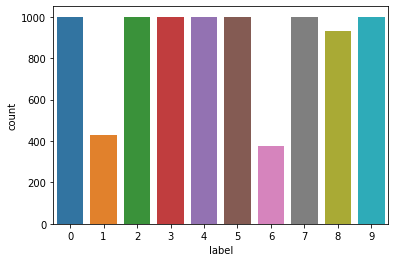

In [ ]:
import seaborn as sns
sns.countplot(df['label'])

In [ ]:
df['label'] = df['label'].astype('str')
df.head(10)

,images,label
0,/content/New_File/chil.155280-2-0-3.png,2
1,/content/New_File/dogs.29936-3-1-0.png,3
2,/content/New_File/airs.202517-0-0-0.png,0
3,/content/New_File/sire.164053-8-2-2.png,8
4,/content/New_File/dril.104817-4-0-11.png,4
5,/content/New_File/cars.7389-1-4-9.png,1
6,/content/New_File/airs.147926-0-0-35.png,0
7,/content/New_File/dril.180127-4-0-17.png,4
8,/content/New_File/sire.159753-8-0-5.png,8
9,/content/New_File/guns.148833-6-0-0.png,6


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Normalizasyon adımları
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale = 1./255,  # görsellerin normalize edilmesi
    rotation_range = 40, 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='categorical'
)

val_iterator = val_generator.flow_from_dataframe(
    test,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='categorical'
)

Found 6985 validated image filenames belonging to 10 classes.
Found 1747 validated image filenames belonging to 10 classes.


In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
            Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
            MaxPool2D((2,2)),
            Conv2D(32, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Conv2D(64, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
14/14 [==============================] - 44s 2s/step - loss: 0.3940 - accuracy: 0.8683 - val_loss: 0.3375 - val_accuracy: 0.9000
Epoch 2/10
14/14 [==============================] - 31s 2s/step - loss: 0.3317 - accuracy: 0.9000 - val_loss: 0.3275 - val_accuracy: 0.9000
Epoch 3/10
14/14 [==============================] - 31s 2s/step - loss: 0.3268 - accuracy: 0.9000 - val_loss: 0.3258 - val_accuracy: 0.9000
Epoch 4/10
14/14 [==============================] - 34s 2s/step - loss: 0.3256 - accuracy: 0.9000 - val_loss: 0.3255 - val_accuracy: 0.9000
Epoch 5/10
14/14 [==============================] - 32s 2s/step - loss: 0.3253 - accuracy: 0.9000 - val_loss: 0.3254 - val_accuracy: 0.9000
Epoch 6/10
14/14 [==============================] - 31s 2s/step - loss: 0.3252 - accuracy: 0.9000 - val_loss: 0.3253 - val_accuracy: 0.9000
Epoch 7/10
14/14 [==============================] - 31s 2s/step - loss: 0.3252 - accuracy: 0.9000 - val_loss: 0.3253 - val_accuracy: 0.9000
Epoch 8/10
14/14 [==

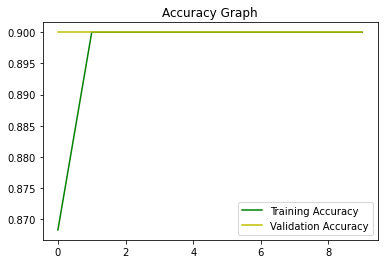

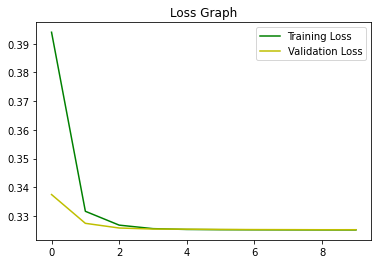

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
!pip install keras-tuner  #hyperparameter optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 30.6 MB/s 
     |████████████████████████████████| 1.6 MB 46.1 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [ ]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.9116666913032532

Best val_accuracy So Far: 0.9158333539962769
Total elapsed time: 00h 02m 41s


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 80)        800       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 48)        96048     
                                                                 
 flatten (Flatten)           (None, 23232)             0         
                                                                 
 dense (Dense)               (None, 128)               2973824   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,071,962
Trainable params: 3,071,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1269 - accuracy: 0.9530 - val_loss: 0.2744 - val_accuracy: 0.9115
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0907 - accuracy: 0.9658 - val_loss: 0.2964 - val_accuracy: 0.9153
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0621 - accuracy: 0.9770 - val_loss: 0.3471 - val_accuracy: 0.9112
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0450 - accuracy: 0.9831 - val_loss: 0.3946 - val_accuracy: 0.9122
Epoch 8/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0345 - accuracy: 0.9876 - val_loss: 0.4373 - val_accuracy: 0.9145
Epoch 9/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0266 - accuracy: 0.9909 - val_loss: 0.4747 - val_accuracy: 0.9075
Epoch 10/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0239 - accuracy: 0.9915 - val_loss: 0.5525 - val_accuracy

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_traing, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:",x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
from keras.layers.core.activation import activations
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(28,28)))

  model.add(layers.Dense(units=hp.Int("units",
                                      min_value=32,
                                      max_value=512,
                                      step=128),
                         activation="relu"))
  model.add(layers.Dense(10, activation="softmax"))
  model.compile(
      optimizer=keras.optimizers.Adam(
          hp.Choice("learning_rate",
                    values=[1e-2,1e-4])),
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"])

  return model
                
      
  

In [ ]:
tuner =RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=3,
    directory="my_dir",
    project_name="Classification")

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 128, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}


In [ ]:
tuner.search(x_train,y_train,
             epochs=10,
             validation_data=(x_test,y_test))

Trial 5 Complete [00h 03m 37s]
val_accuracy: 0.9523333509763082

Best val_accuracy So Far: 0.9677333235740662
Total elapsed time: 00h 17m 29s


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/Classification
Showing 10 best trials
Trial summary
Hyperparameters:
units: 416
learning_rate: 0.0001
Score: 0.9677333235740662
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.0001
Score: 0.9523333509763082
Trial summary
Hyperparameters:
units: 416
learning_rate: 0.01
Score: 0.2441666622956594
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.01
Score: 0.17390000323454538
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.0001
Score: 0.13769999891519547
